##### $\hspace{15pt}$ **Filename: multipleLinearRegression.ipynb**
##### $\hspace{1.5pt}$ **Date Created: May 5, 2024**
##### $\rule{10.5in}{1pt}$
##### **Fit a multiple linear regression model to the [car price prediction dataset](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction) from Kaggle to predict the price of a car.**

##### **The file `CarPrice_Assignment.csv` that has to be accessed is available in this [Google Drive folder](https://drive.google.com/drive/folders/1lGqX9R_jYbRBLDGQOx9RYkGD2VKFIHHc?usp=sharing). Before running this notebook in Colab, either change the path to access the file, or create the subfolder `/Colab Notebooks/016_multipleLinearRegression` in your Google drive and copy the file to the subfolder. Restart the runtime after installing the packages and before running the remaining cells of the notebook.**

##### $\rule{10.5in}{1pt}$

##### Install `dython`.

In [ ]:
!pip install dython -q

##### Update `seaborn`.

In [ ]:
!pip install -U seaborn -q

##### Restart the runtime, and load modules and packages.

In [ ]:
from dython.nominal import associations
from google.colab import drive
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

##### Set pandas dataframes to display all the columns.

In [ ]:
pd.set_option("display.max_columns", None)

##### Set the number of rows to display in pandas dataframes.

In [ ]:
pd.set_option("display.max_rows", 100)

##### Set the float format of pandas dataframes.

In [ ]:
pd.options.display.float_format = "{:.2f}".format

##### Mount Google Drive to Colab.

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Set the path to access the file needed by this notebook.

In [ ]:
path = "gdrive/MyDrive/Colab Notebooks/016_multipleLinearRegression/"

##### Load the dataset from Google Drive.

In [ ]:
dataset = pd.read_csv(path + "CarPrice_Assignment.csv")
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


##### Check if there are missing values.

In [ ]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### Create a column consisting of the name of the car company extracted from the name of the car.

In [ ]:
dataset.insert(loc = 3, column = "carCompany", value = [re.match(r"^\S+\b", s).group(0) for s in dataset.CarName])
dataset["carCompany"] = [s.lower() for s in dataset.carCompany]
dataset.head()

,car_ID,symboling,CarName,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


##### Drop the `car_ID` and `CarName` columns.

In [ ]:
dataset.drop(columns = ["car_ID", "CarName"], inplace = True)

##### Build a one-hot encoding of each of the categorical features.

In [ ]:
categoricalFeatures = dataset.select_dtypes(include = "object").columns.tolist()
categoricalFeatures = ["symboling"] + categoricalFeatures
oneHotEncodedDataset = pd.get_dummies(dataset, columns = categoricalFeatures, drop_first = True, dtype = int)
features = oneHotEncodedDataset.columns.tolist()
features.remove("price")
oneHotEncodedDataset = oneHotEncodedDataset[features + ["price"]]
oneHotEncodedDataset.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carCompany_audi,carCompany_bmw,carCompany_buick,carCompany_chevrolet,carCompany_dodge,carCompany_honda,carCompany_isuzu,carCompany_jaguar,carCompany_maxda,carCompany_mazda,carCompany_mercury,carCompany_mitsubishi,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porcshce,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_toyouta,carCompany_vokswagen,carCompany_volkswagen,carCompany_volvo,carCompany_vw,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,13495.00
1,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,16500.00
2,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,16500.00
3,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,13950.00
4,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17450.00


##### Split the dataset with one-hot-encoded categorical features into training and test sets.

In [ ]:
X = oneHotEncodedDataset[features]
y = oneHotEncodedDataset[["price"]]
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size = 0.7, random_state = 1)

trainSet = pd.concat([xTrain, yTrain], axis = 1)
trainSet.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carCompany_audi,carCompany_bmw,carCompany_buick,carCompany_chevrolet,carCompany_dodge,carCompany_honda,carCompany_isuzu,carCompany_jaguar,carCompany_maxda,carCompany_mazda,carCompany_mercury,carCompany_mitsubishi,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porcshce,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_toyouta,carCompany_vokswagen,carCompany_volkswagen,carCompany_volvo,carCompany_vw,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
124,95.90,173.20,66.30,50.20,2818,156,3.59,3.86,7.00,145,5000,19,24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,12764.00
181,104.50,187.80,66.50,54.10,3151,161,3.27,3.35,9.20,156,5200,19,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,15750.00
154,95.70,169.70,63.60,59.10,2290,92,3.05,3.03,9.00,62,4800,27,32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,7898.00
53,93.10,166.80,64.20,54.10,1945,91,3.03,3.15,9.00,68,5000,31,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6695.00
94,94.50,165.30,63.80,54.50,1951,97,3.15,3.29,9.40,69,5200,31,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,7299.00


In [ ]:
testSet = pd.concat([xTest, yTest], axis = 1)
testSet.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carCompany_audi,carCompany_bmw,carCompany_buick,carCompany_chevrolet,carCompany_dodge,carCompany_honda,carCompany_isuzu,carCompany_jaguar,carCompany_maxda,carCompany_mazda,carCompany_mercury,carCompany_mitsubishi,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porcshce,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_toyouta,carCompany_vokswagen,carCompany_volkswagen,carCompany_volvo,carCompany_vw,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
78,93.70,157.30,64.40,50.80,2004,92,2.97,3.23,9.40,68,5500,31,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6669.00
97,94.50,170.20,63.80,53.50,2037,97,3.15,3.29,9.40,69,5200,31,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,7999.00
151,95.70,158.70,63.60,54.50,2040,92,3.05,3.03,9.00,62,4800,31,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6338.00
44,94.50,155.90,63.60,52.00,1874,90,3.03,3.11,9.60,70,5400,38,43,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,8916.50
40,96.50,175.40,62.50,54.10,2372,110,3.15,3.58,9.00,86,5800,27,33,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10295.00


##### Visualize the continuous features in the training set.

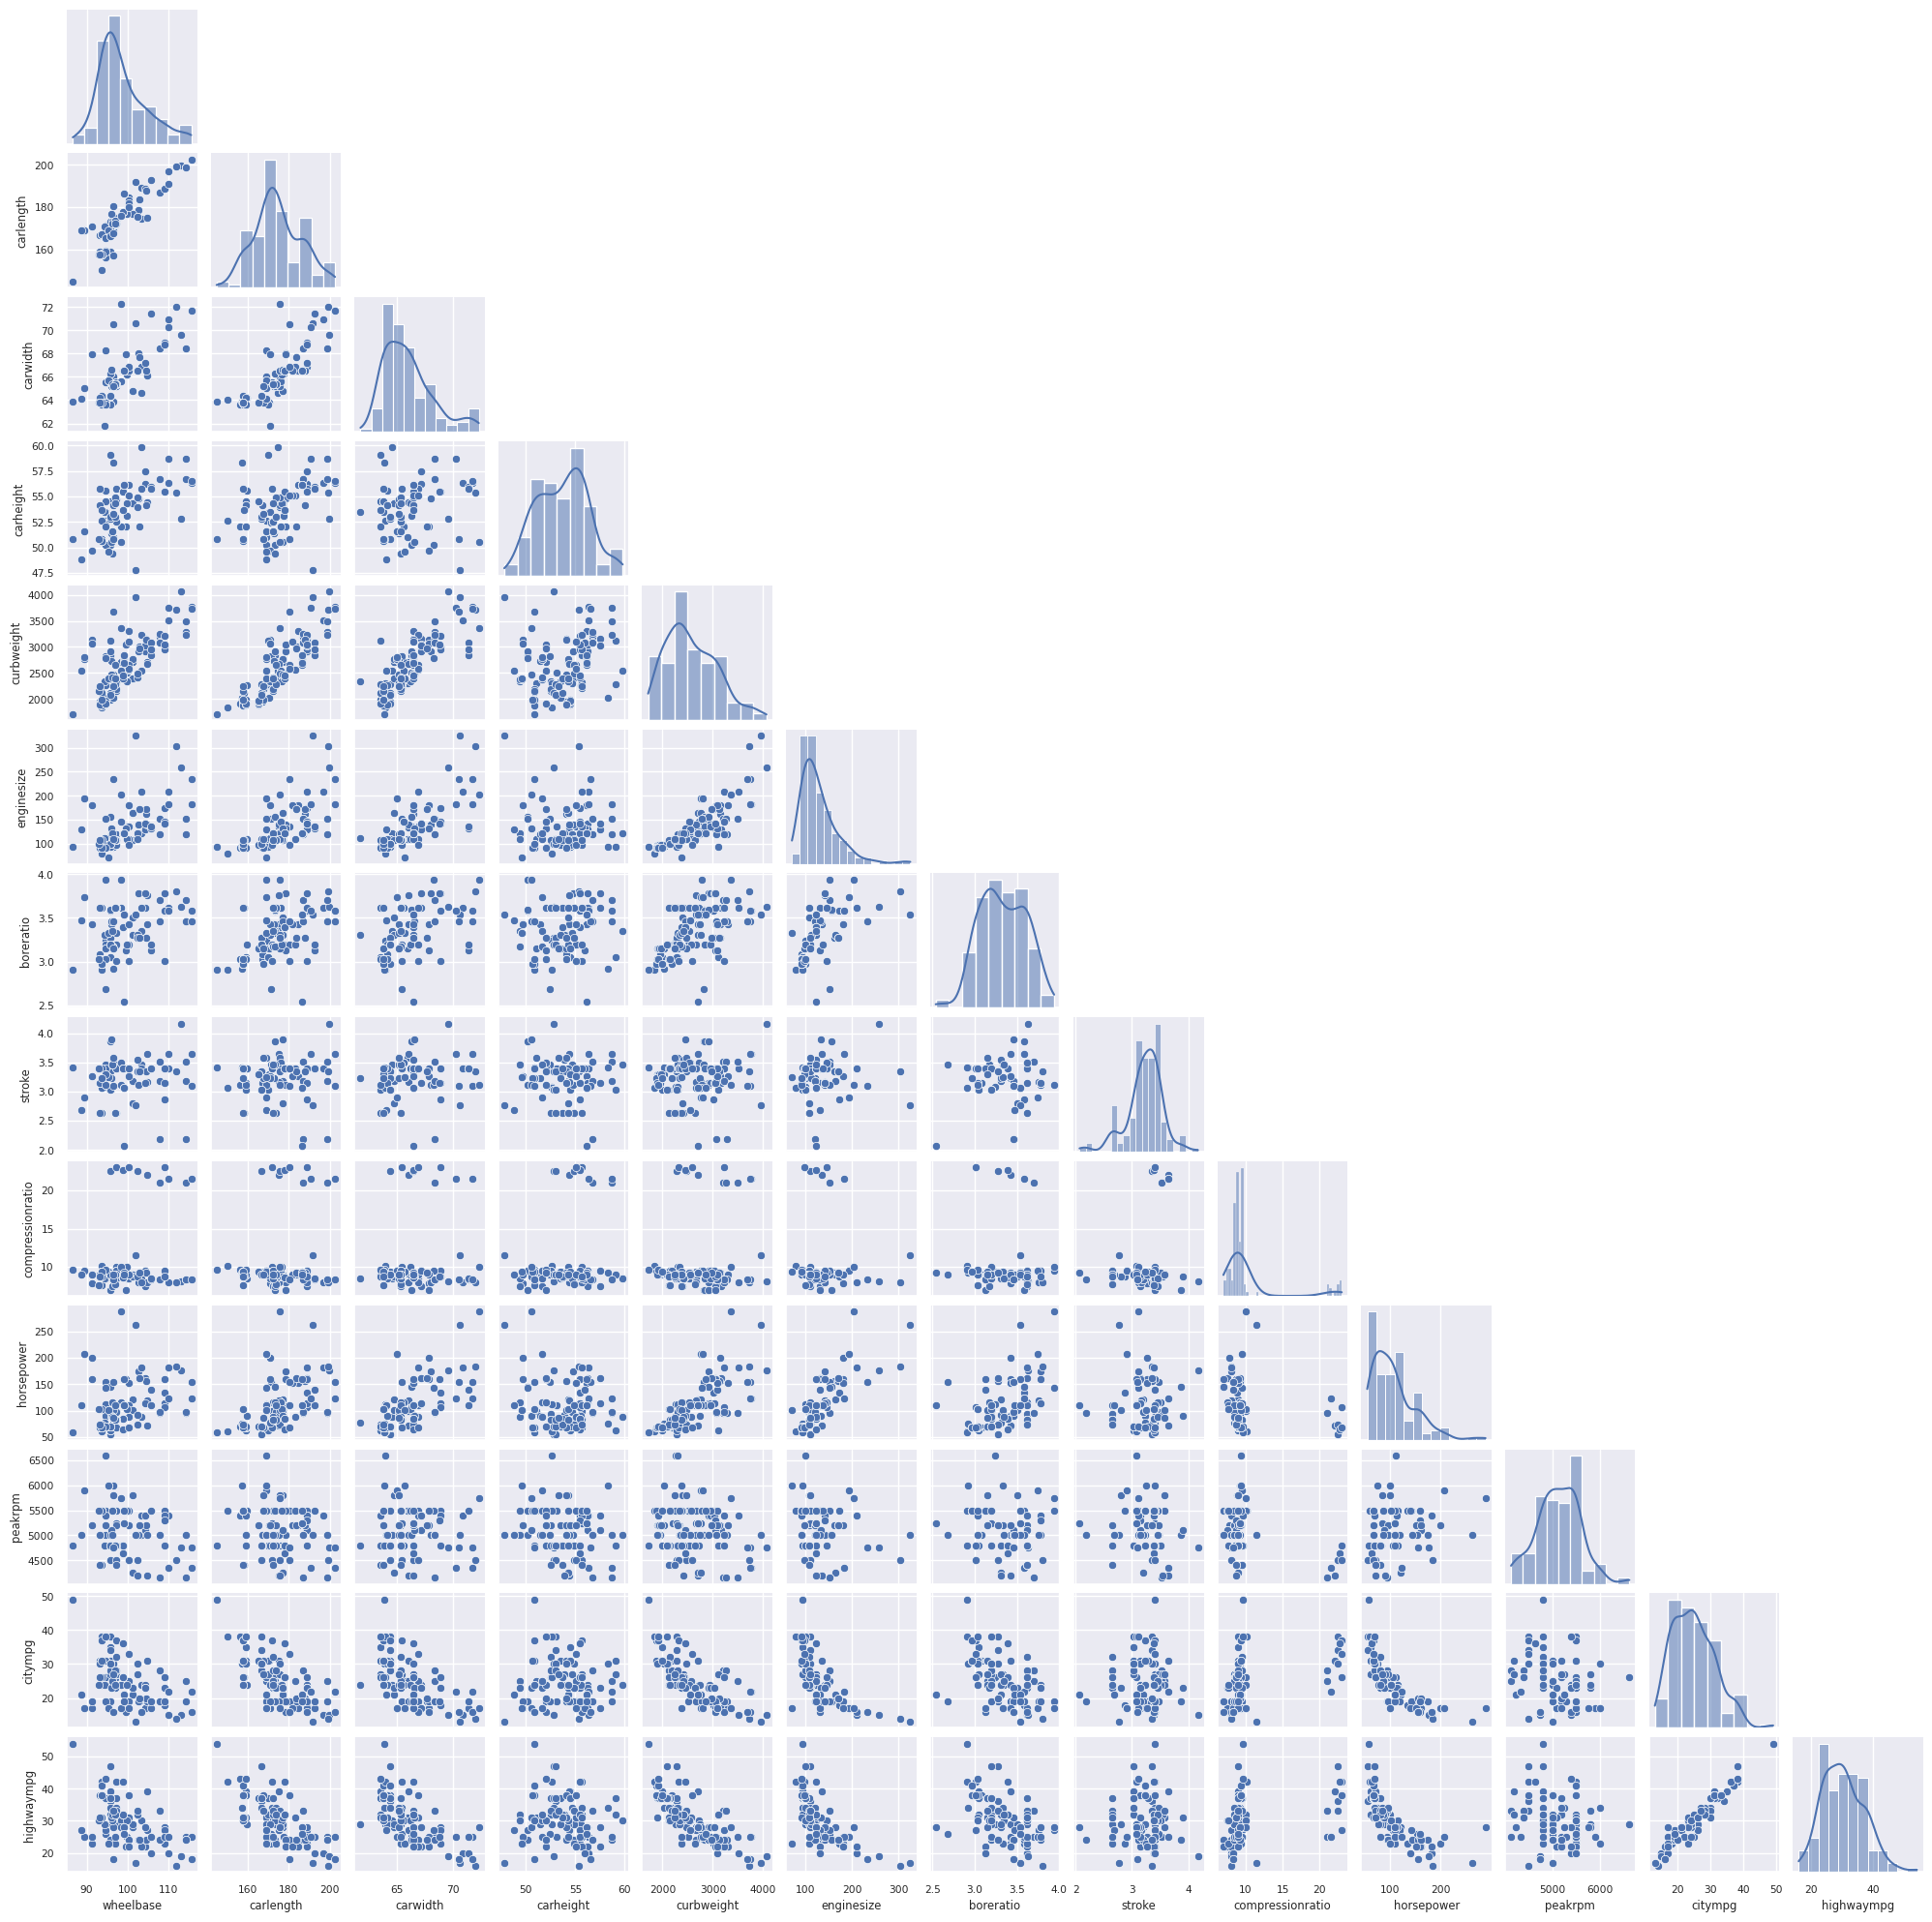

In [ ]:
continuousFeatures = dataset.select_dtypes(include = "number").columns.tolist()
continuousFeatures.remove("symboling")
continuousFeatures.remove("price")

sns.set_style("white")
sns.set(font_scale = 0.7)
grid = sns.PairGrid(trainSet, vars = continuousFeatures, corner = True, diag_sharey = False)
grid.fig.set_size_inches(20, 20)
grid.map_diag(sns.histplot, stat = "percent", kde = True)
grid.map_lower(sns.scatterplot)
plt.show()

##### Visualize the categorical features in the training set.

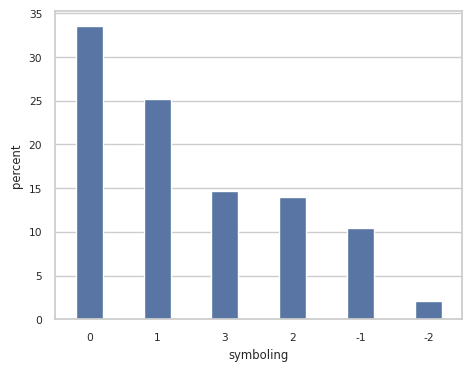

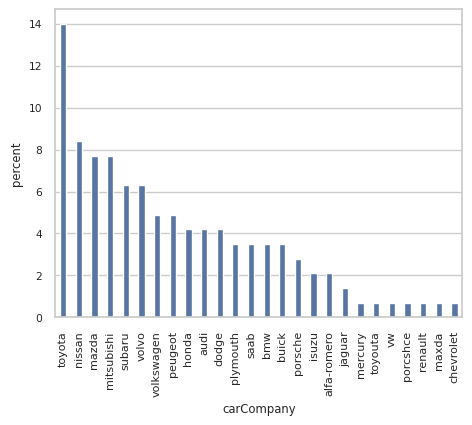

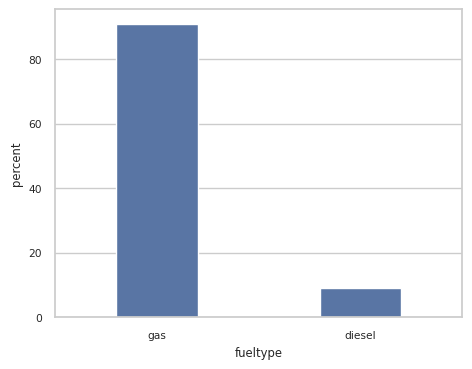

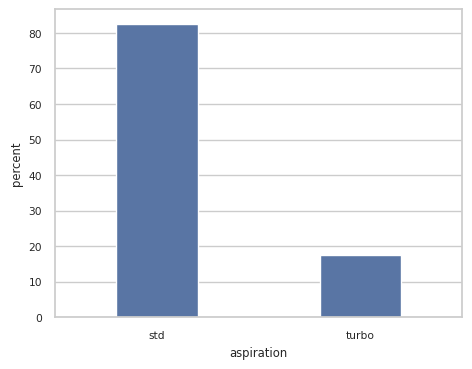

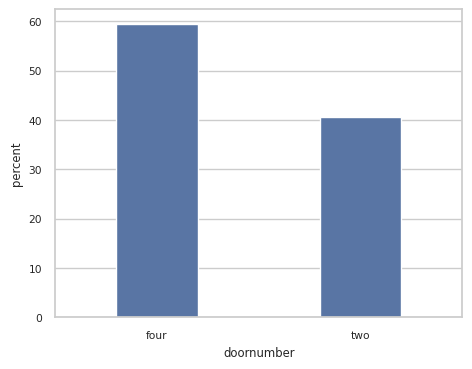

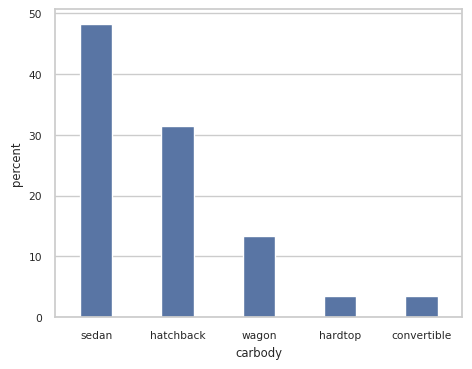

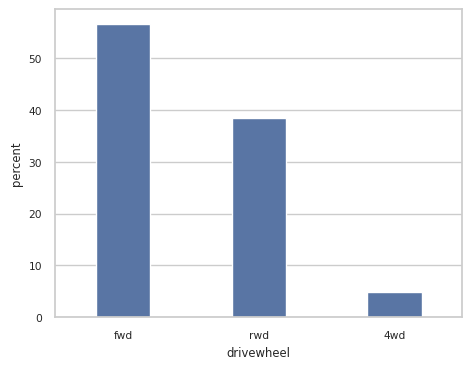

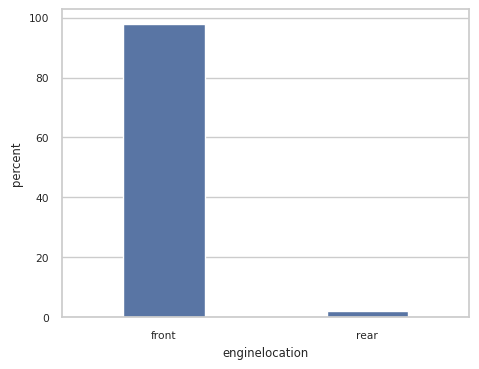

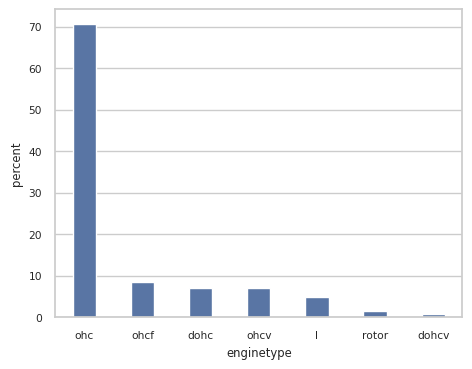

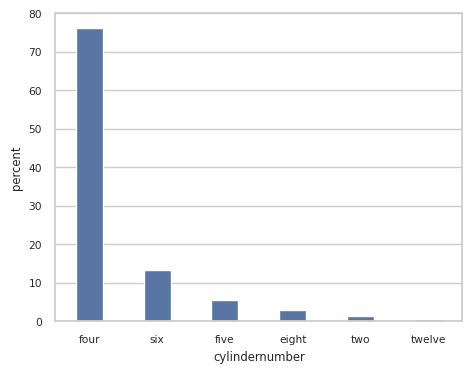

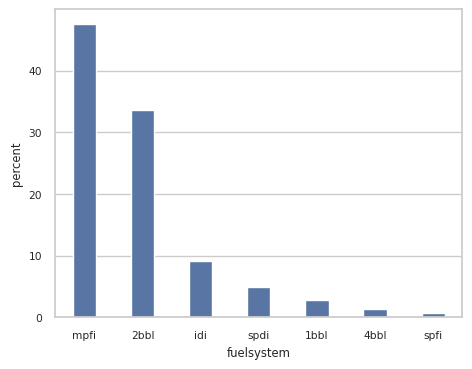

In [ ]:
plt.rcParams["figure.figsize"] = [5.25, 4]
sns.set_style("whitegrid")

for feature in categoricalFeatures:

    valueCounts = dataset.loc[trainSet.index, feature].value_counts()
    categoricalLevels = valueCounts.index.tolist()
    ax = sns.countplot(data = dataset.loc[trainSet.index], x = feature, order = categoricalLevels, stat = "percent", width = 0.4)

    if feature == "carCompany":
       ax.tick_params(axis = "x", rotation = 90, labelsize = 8)

    plt.show()
    print("")
    print("")
    print("")

##### Visualize the target in the training set.

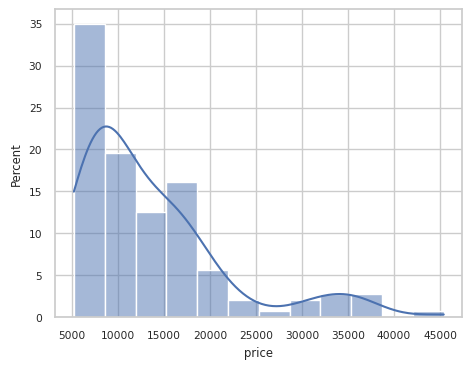

In [ ]:
sns.histplot(data = trainSet, x = "price", stat = "percent", kde = True)
plt.show()

##### Create a correlation heatmap.

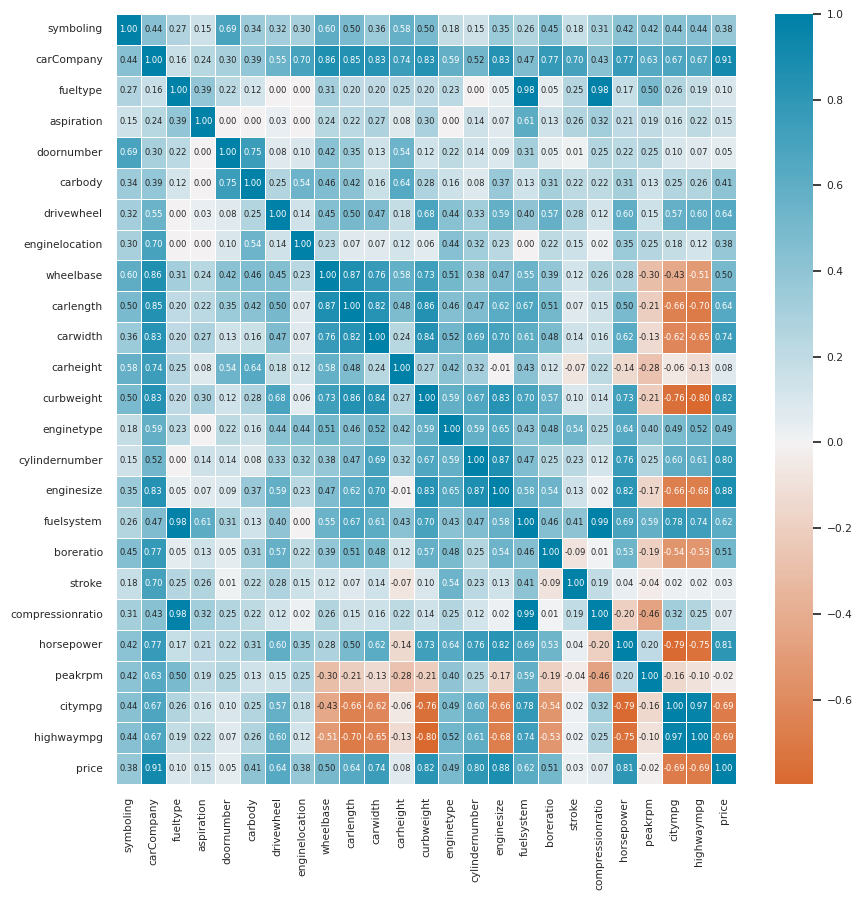

In [ ]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 0.7)
correlationMatrix = associations(dataset.loc[trainSet.index], nominal_columns = categoricalFeatures, compute_only = True)["corr"]
cmap = sns.diverging_palette(20, 230, s = 100, as_cmap = True)
sns.heatmap(correlationMatrix, cmap = cmap, center = 0, annot = True, annot_kws = {"fontsize": 6}, fmt = ".2f", linewidths = 0.5)
plt.show()

##### Fit a multiple linear regression model to the training set.

In [ ]:
model = LinearRegression()
X = trainSet[features]
y = trainSet["price"]
model.fit(X, y)

LinearRegression()

##### Display the estimated intercept and coefficients of the model.

In [ ]:
interceptCoefficients = pd.DataFrame({"intercept/feature": ["intercept"] + features, "estimatedValue": [model.intercept_] + model.coef_.tolist()})
interceptCoefficients

,intercept/feature,estimatedValue
0,intercept,-29508.04
1,wheelbase,332.26
2,carlength,-210.19
3,carwidth,986.41
4,carheight,-105.78
5,curbweight,3.14
6,enginesize,75.50
7,boreratio,-3059.22
8,stroke,-1971.85
9,compressionratio,-1062.82


##### Predict `price` on the test set.

In [ ]:
predictions = model.predict(testSet[features])
testSetPredictions = pd.DataFrame({"truePrice": testSet.price, "predictedPrice": predictions})
testSetPredictions

,truePrice,predictedPrice
78,6669.00,6097.80
97,7999.00,6229.34
151,6338.00,6373.35
44,8916.50,7530.85
40,10295.00,5233.39
67,25552.00,28928.47
98,8249.00,6868.78
18,5151.00,-2450.59
152,6488.00,7519.35
62,10245.00,11478.53


##### Calculate $R^2$, $\rm MSE$, and $\rm RMSE$ on the test set.

In [ ]:
R2 = r2_score(testSet.price, predictions)
R2

0.8862960186615594

In [ ]:
MSE = mean_squared_error(testSet.price, predictions)
MSE

6864379.837187837

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

2619.996152132258